In [1]:
#makes tuning heatmaps that show how tuning is distributed across the area 6v and area 44 arrays (Fig 1f)
baseDir = '/oak/stanford/groups/shenoy/fwillett/speechPaperRelease_final/'

In [2]:
import scipy.io
subtractMeansWithinBlock = True

phonemesDat = scipy.io.loadmat(baseDir+'tuningTasks/t12.2022.04.26_phonemes.mat')
orofacialDat = scipy.io.loadmat(baseDir+'tuningTasks/t12.2022.04.21_orofacial.mat')
fiftyWordDat = scipy.io.loadmat(baseDir+'tuningTasks/t12.2022.05.03_fiftyWordSet.mat')

In [3]:
#mean-subtract within block
import numpy as np
def meanSubtract(dat):
    dat['tx2'] = dat['tx2'].astype(np.float32)
    blockList = np.squeeze(np.unique(dat['blockNum']))
    for b in blockList:
        loopIdx = np.squeeze(dat['blockNum']==b)
        dat['tx2'][loopIdx,:] -= np.mean(dat['tx2'][loopIdx,:],axis=0,keepdims=True)
    return dat

#mean subtraction
if subtractMeansWithinBlock:
    phonemesDat = meanSubtract(phonemesDat)
    orofacialDat = meanSubtract(orofacialDat)
    fiftyWordDat = meanSubtract(fiftyWordDat)

In [4]:
import numpy as np
from analysis import unscrambleChans

#unscramble channels into a linear ordering that maps to array geometry in a simple way
phonemesDat['tx2'][:,0:128] = unscrambleChans(phonemesDat['tx2'][:,0:128])
orofacialDat['tx2'][:,0:128] = unscrambleChans(orofacialDat['tx2'][:,0:128])
fiftyWordDat['tx2'][:,0:128] = unscrambleChans(fiftyWordDat['tx2'][:,0:128])

phonemesDat['tx2'][:,128:] = unscrambleChans(phonemesDat['tx2'][:,128:])
orofacialDat['tx2'][:,128:] = unscrambleChans(orofacialDat['tx2'][:,128:])
fiftyWordDat['tx2'][:,128:] = unscrambleChans(fiftyWordDat['tx2'][:,128:])

2023-06-13 16:55:13.478178: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 16:55:13.711341: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-13 16:55:21.134693: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /share/software/user/open/gcc/10.1.0/lib64:/share/software/user/open/gcc/10.1.0/lib/gcc/x86_64-pc-linux-gnu:/share/software/user/open/gcc/10.1.0/lib:/share/software/user/open/cudnn/8.6.0.163/lib:/usr/lib64/nvidia

In [12]:
import scipy.stats
import matplotlib.pyplot as plt
from analysis import makeTuningHeatmap, heatmapPlotCircles

#quantify 
oroCueSets = [[5,6,7,8],
              [9,10,11,12],
              [13,14,15,16,17,18],
              [23,24,25,26,27,28],
              [29,30,31,32,33],
              [19,20,21,22]]

phonemeSets = [[0,6,12,18,24,30]]
fiftyWordSets = [[1,8,16,24,32,40]]

tuningR2_oro, tuningPVal_oro = makeTuningHeatmap(orofacialDat, oroCueSets, [10,50])
tuningR2_phones, tuningPVal_phones = makeTuningHeatmap(phonemesDat, phonemeSets, [10,50])
tuningR2_fiftyWord, tuningPVal_fiftyWord = makeTuningHeatmap(fiftyWordDat, fiftyWordSets, [10,50])

tuningR2_all = np.concatenate([tuningR2_oro, tuningR2_phones, tuningR2_fiftyWord], axis=1)
tuningPVal_all = np.concatenate([tuningPVal_oro, tuningPVal_phones, tuningPVal_fiftyWord], axis=1)


In [13]:
heatmapPlotCircles(tuningR2_all[0:128,:],
            tuningPVal_all[0:128,:]<0.0001,
            [0,0.7], 
            ['Forehead','Eyelids','Jaw','Lips','Tongue','Larynx','Phonemes','Words'],
            '6v')
plt.show()

NameError: name 'cm' is not defined

In [ ]:
heatmapPlotCircles(tuningR2_all[128:256,:],
            tuningPVal_all[128:256,:]<0.0001,
            [0,0.7], 
            ['Forehead','Eyelids','Jaw','Lips','Tongue','Larynx','Phonemes','Words'],
            'ifg')

plt.show()

In [9]:
chanSets = [np.arange(64,128).astype(np.int32), np.arange(0,64).astype(np.int32),
           np.arange(128,192).astype(np.int32), np.arange(192,256).astype(np.int32)]
allCatCounts = []

for setIdx in range(len(chanSets)):
    numCategories = np.sum(tuningPVal_all[chanSets[setIdx],:]<0.0001, axis=1)
    catCount = np.zeros([7])
    for catIdx in range(7):
        catCount[catIdx] = np.sum(numCategories==catIdx)
    allCatCounts.append(catCount)

/tmp/ipykernel_52910/2475635295.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('viridis')


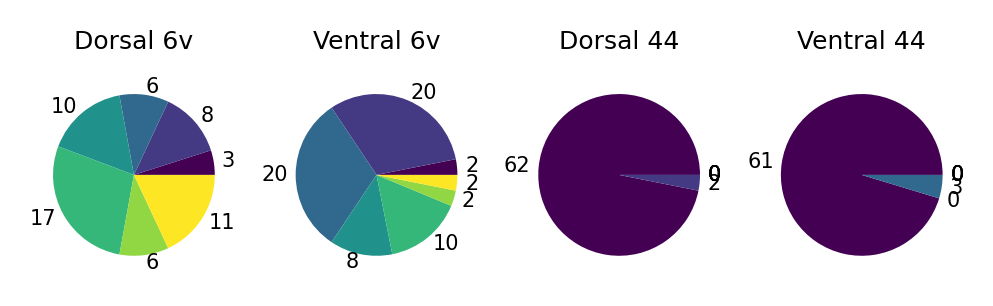

In [10]:
# Creating plot
import matplotlib
from analysis import plotPreamble
plotPreamble()

cmap = matplotlib.cm.get_cmap('viridis')
colors = cmap(np.linspace(0,1,7))
titles = ['Dorsal 6v','Ventral 6v','Dorsal 44','Ventral 44']

fig = plt.figure(figsize=(4,1), dpi=300)
for setIdx in range(len(chanSets)):
    theseLabels = []
    for x in range(len(allCatCounts[setIdx])):
        theseLabels.append(str(int(allCatCounts[setIdx][x])))
    plt.subplot(1,4,setIdx+1)
    plt.pie(allCatCounts[setIdx], labels = theseLabels, colors = colors)
    plt.title(titles[setIdx])

plt.show()

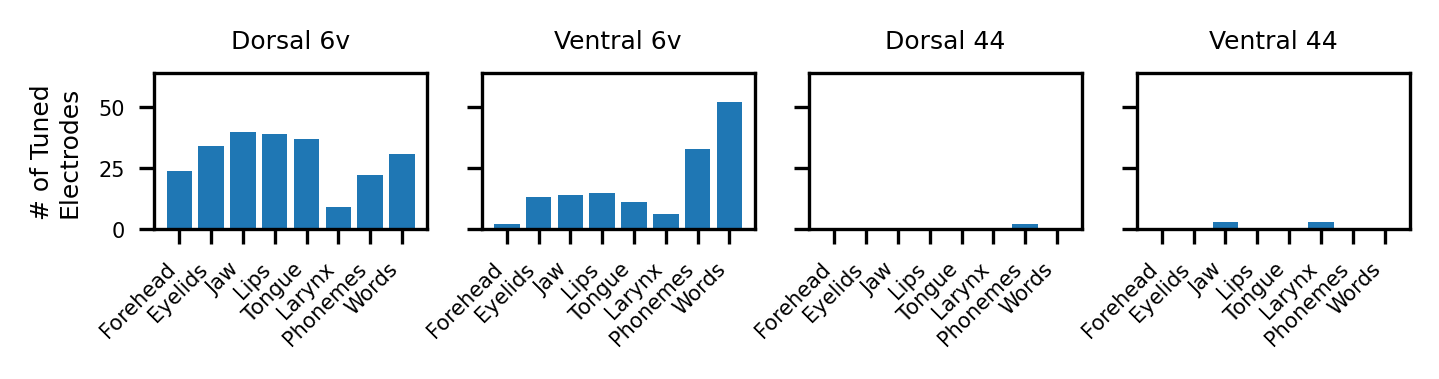

In [11]:
titles = ['Dorsal 6v','Ventral 6v','Dorsal 44','Ventral 44']
plt.figure(dpi=300, figsize=(6*0.90, 0.75*0.90))
for setIdx in range(len(chanSets)):
    plt.subplot(1,4,setIdx+1)
    categories = np.sum(tuningPVal_all[chanSets[setIdx],:]<0.0001, axis=0)
    plt.bar(np.arange(0, len(categories)).astype(np.int32), categories)
    plt.ylim([0,64])
    plt.xticks(ticks=np.arange(0,8), labels=['Forehead','Eyelids','Jaw','Lips','Tongue','Larynx','Phonemes','Words'], rotation=45, ha="right")
    if setIdx>0:
        plt.yticks(ticks=[0,25,50],labels=[])
    if setIdx==0:
        plt.ylabel('# of Tuned\nElectrodes')
    plt.title(titles[setIdx])

plt.show()